# Preamble


The default behavior of some transpilers does not result in the merging of reset instructions

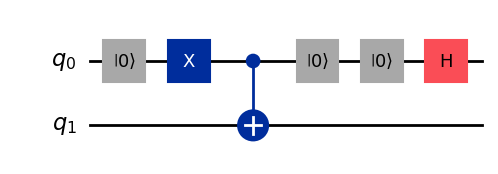

In [1]:
from qiskit import QuantumCircuit, transpile

qc = QuantumCircuit(2)
qc.reset(0)
qc.x(0)
qc.cx(0, 1)
qc.reset(0)
qc.reset(0)
qc.h(0)
qc.draw(output='mpl')

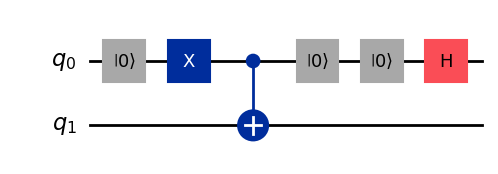

In [2]:
qc_basic_transpile = transpile(qc, optimization_level=3)
qc_basic_transpile.draw(output='mpl', style='iqp')

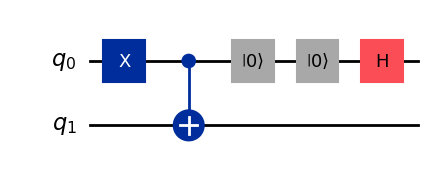

In [3]:
from qiskit.transpiler.passes.optimization.remove_reset_in_zero_state import RemoveResetInZeroState
from qiskit.converters import circuit_to_dag, dag_to_circuit

remove_reset = RemoveResetInZeroState()
remove_reset(qc).draw('mpl')

## Making a Transpilation Pass

Documentation https://github.com/Qiskit/documentation/blob/kjs/transpiler-plugins/docs/transpile/transpiler-plugins.ipynb

Note that the double-reset is turned into just one.

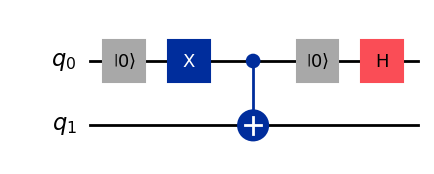

In [4]:
from dynacir.dynacir_passes import CollectResets

collect_resets = CollectResets()

circuit_with_less_resets = collect_resets(qc)
circuit_with_less_resets.draw(output='mpl')

## Testing the plugin

In [5]:
from qiskit.transpiler.preset_passmanagers.plugin import list_stage_plugins
print(list_stage_plugins("optimization"))

['dynacir', 'default']


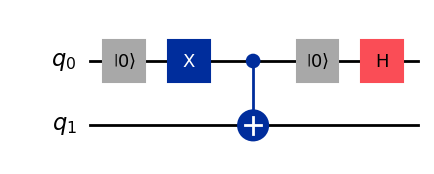

In [6]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

pm = generate_preset_pass_manager(optimization_level=3, optimization_method="dynacir"
)

qc_dynacir = pm.run(qc)
qc_dynacir.draw(output='mpl', style='iqp')